In [1]:
# 查看当前挂载的数据集目录, 该目录下的变更重启环境后会自动还原
!ls /home/aistudio/data

In [2]:
# 查看工作区文件, 该目录下的变更将会持久保存. 请及时清理不必要的文件, 避免加载过慢.
!ls /home/aistudio/work

test.csv  train.csv


In [1]:
!pip install imbalanced-learn==0.6 -t /opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 4.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.1/38.1 MB 3.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 6.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.8/24.8 MB 3.7 MB/s eta 0:00:0000:0100:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
parl 1.4.1 requires pyzmq==18.1.1, but you have pyzmq 23.2.1 which is incompatible.
paddlefsl 1.0.0 requires numpy~=1.19.2, but you have numpy 1.21.6 which is incompatible.

[notice] A new release of pip available: 22.1.2 -> 22.3
[notice] To update, run: pip install --upgrade pip


In [2]:
# 库引用
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

请点击[此处](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576)查看本环境基本用法.  <br>
Please click [here ](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576) for more detailed instructions. 

In [10]:
# 读取数据
train = pd.read_csv('/home/aistudio/work/train.csv')
test = pd.read_csv('/home/aistudio/work/test.csv')
# 查看数据数量
print('train size', train.shape, ',test size',test.shape)

train size (22500, 22) ,test size (7500, 21)


In [11]:
# 查看数据统计信息
train.describe()

,id,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_index,cons_conf_index,lending_rate3m,nr_employed
count,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000
mean,11250.500000,40.407511,1146.303733,3.364800,773.991956,1.316444,0.078529,93.548785,-39.877180,3.302490,5137.211285
std,6495.334864,12.086078,1432.432125,7.223837,326.934334,1.918733,1.573831,2.805786,5.805442,1.611777,170.670611
min,1.000000,16.000000,0.000000,0.000000,0.000000,0.000000,-3.400000,87.640000,-53.280000,0.600000,4715.420000
25%,5625.750000,32.000000,143.000000,1.000000,557.750000,0.000000,-1.800000,91.190000,-44.160000,1.430000,5008.510000
50%,11250.500000,38.000000,353.000000,1.000000,964.000000,0.000000,1.100000,93.540000,-40.600000,3.920000,5133.955000
75%,16875.250000,47.000000,1873.000000,3.000000,1005.000000,2.000000,1.400000,95.920000,-35.797500,4.830000,5267.677500
max,22500.000000,101.000000,5149.000000,57.000000,1048.000000,6.000000,1.400000,99.460000,-25.550000,5.270000,5489.500000


In [12]:
# 查看数据基本信息
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22500 entries, 0 to 22499
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                22500 non-null  int64  
 1   age               22500 non-null  int64  
 2   job               22500 non-null  object 
 3   marital           22500 non-null  object 
 4   education         22500 non-null  object 
 5   default           22500 non-null  object 
 6   housing           22500 non-null  object 
 7   loan              22500 non-null  object 
 8   contact           22500 non-null  object 
 9   month             22500 non-null  object 
 10  day_of_week       22500 non-null  object 
 11  duration          22500 non-null  int64  
 12  campaign          22500 non-null  int64  
 13  pdays             22500 non-null  int64  
 14  previous          22500 non-null  int64  
 15  poutcome          22500 non-null  object 
 16  emp_var_rate      22500 non-null  float6

In [13]:
# 查看数据标签
str_features = []
num_features = []
for col in train.columns:
    if train[col].dtype=='object' and col not in ['subscribe']:
        str_features.append(col)
        print(col,':  ',train[col].unique())
    if (train[col].dtype=='int64' or train[col].dtype=='float64') and col not in ['id']:
        num_features.append(col)

job :   ['admin.' 'services' 'blue-collar' 'entrepreneur' 'management'
 'technician' 'housemaid' 'self-employed' 'unemployed' 'retired' 'student'
 'unknown']
marital :   ['divorced' 'married' 'single' 'unknown']
education :   ['professional.course' 'high.school' 'basic.9y' 'university.degree'
 'unknown' 'basic.4y' 'basic.6y' 'illiterate']
default :   ['no' 'unknown' 'yes']
housing :   ['yes' 'no' 'unknown']
loan :   ['yes' 'no' 'unknown']
contact :   ['cellular' 'telephone']
month :   ['aug' 'may' 'apr' 'nov' 'jul' 'jun' 'oct' 'dec' 'sep' 'mar']
day_of_week :   ['mon' 'wed' 'fri' 'tue' 'thu']
poutcome :   ['failure' 'nonexistent' 'success']


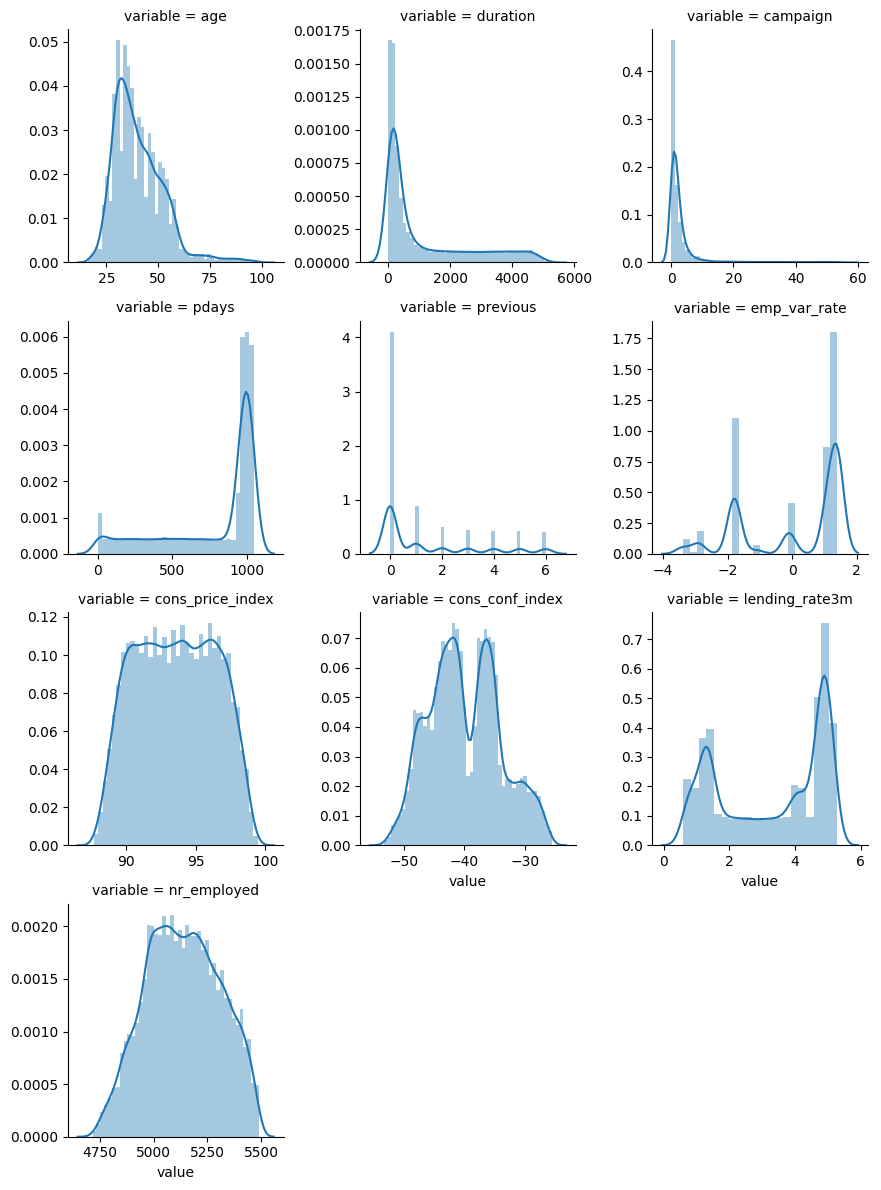

In [14]:
# 每个数字特征得分布可视化，查看连续性数据的分布
f = pd.melt(train, value_vars= num_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False)
g = g.map(sns.distplot, "value") 

In [15]:
# 查看离散数据的分布
for col in str_features:
    print('{:-^30}'.format(col))
    print(train[col].value_counts())

-------------job--------------
admin.           5557
blue-collar      4874
technician       3530
services         2083
management       1600
retired          1006
entrepreneur      863
self-employed     836
housemaid         657
unemployed        647
student           573
unknown           274
Name: job, dtype: int64
-----------marital------------
married     13178
single       6344
divorced     2658
unknown       320
Name: marital, dtype: int64
----------education-----------
university.degree      6524
high.school            5031
basic.9y               3266
professional.course    2853
basic.4y               2322
basic.6y               1349
unknown                 994
illiterate              161
Name: education, dtype: int64
-----------default------------
no         17261
unknown     4860
yes          379
Name: default, dtype: int64
-----------housing------------
yes        11568
no         10046
unknown      886
Name: housing, dtype: int64
-------------loan-------------
no         179

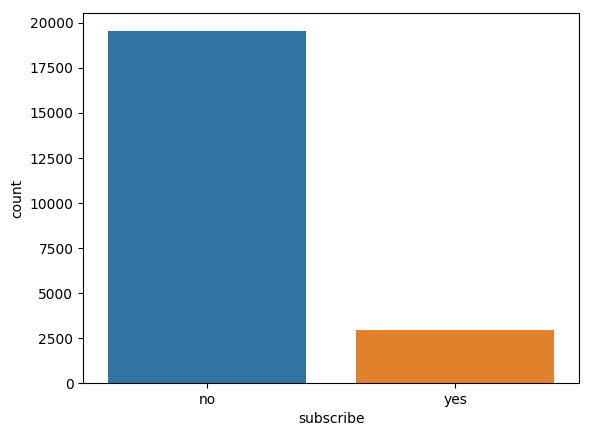

In [17]:
# 查看结果标签的分布
sns.countplot(train['subscribe'])

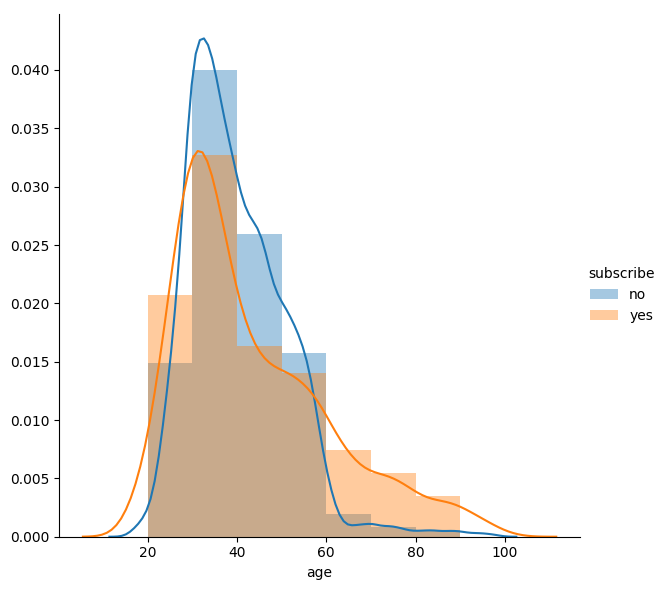

In [18]:
# 查看购买和未购买用户的年龄分布
g1 = sns.FacetGrid(data=train,height=6,hue='subscribe')
g1 = (g1.map(sns.distplot,'age',bins=[20,30,40,50,60,70,80,90]).add_legend())

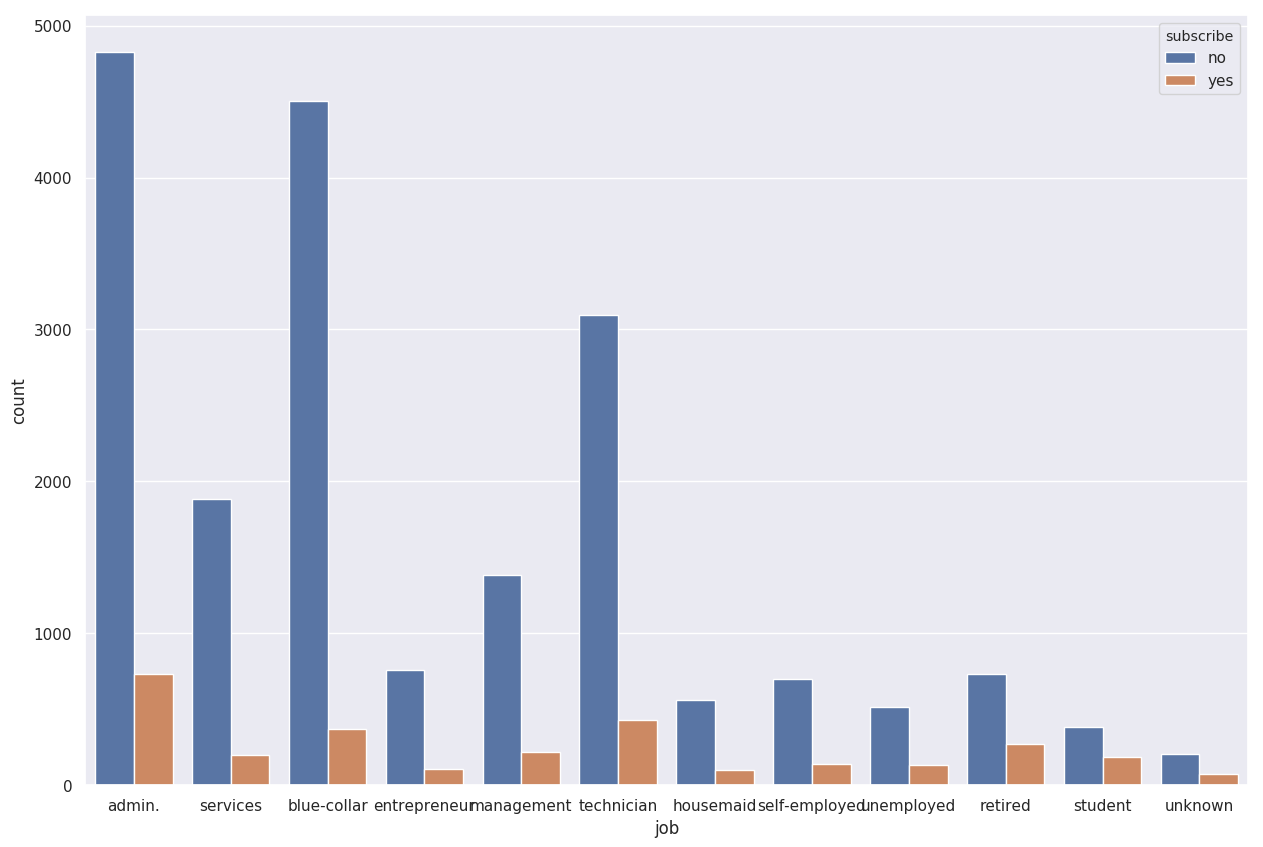

In [23]:
# 查看不同职业的购买比例
sns.set(rc={'figure.figsize':(15,10)})
sns.countplot(x="job", hue="subscribe", data=train)

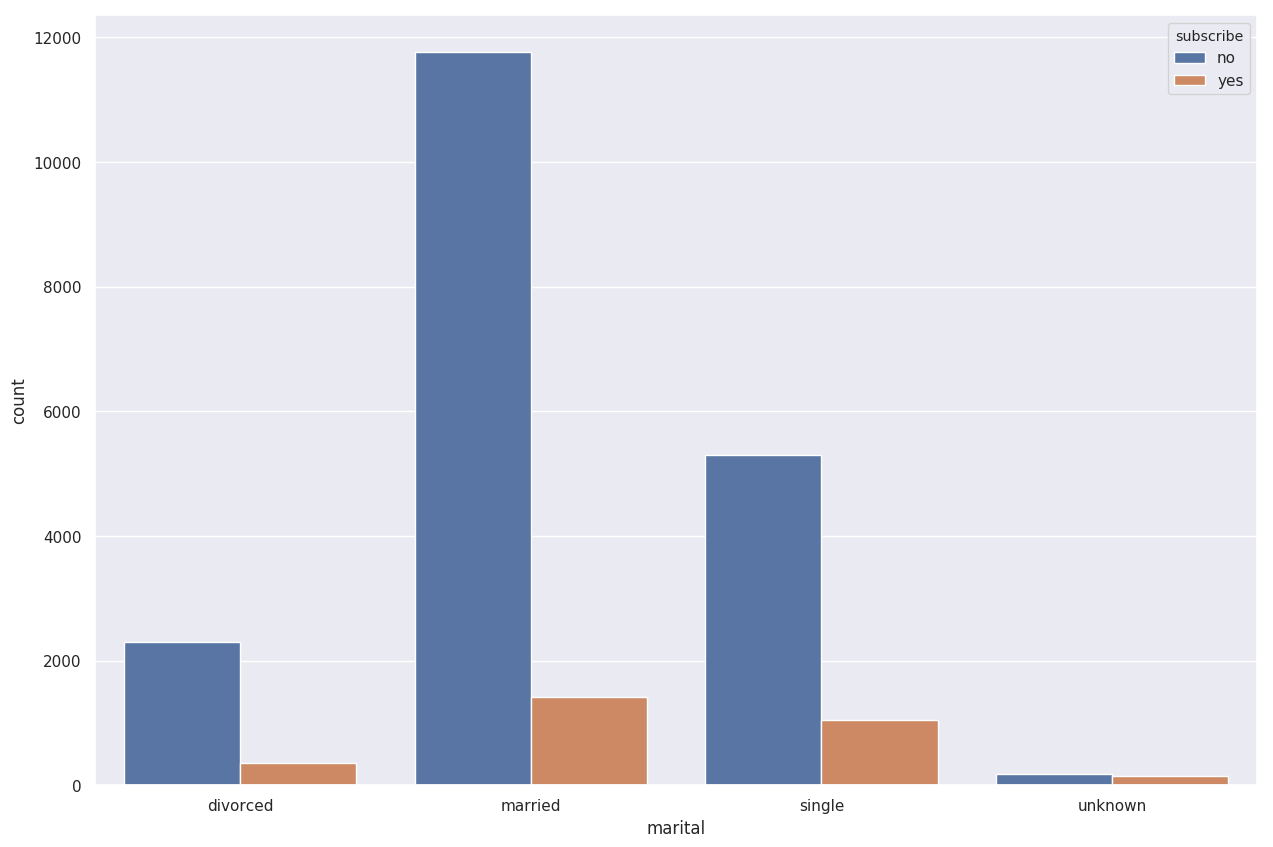

In [27]:
# 查看婚姻情况的购买情况
sns.countplot(data=train,x='marital',hue='subscribe')

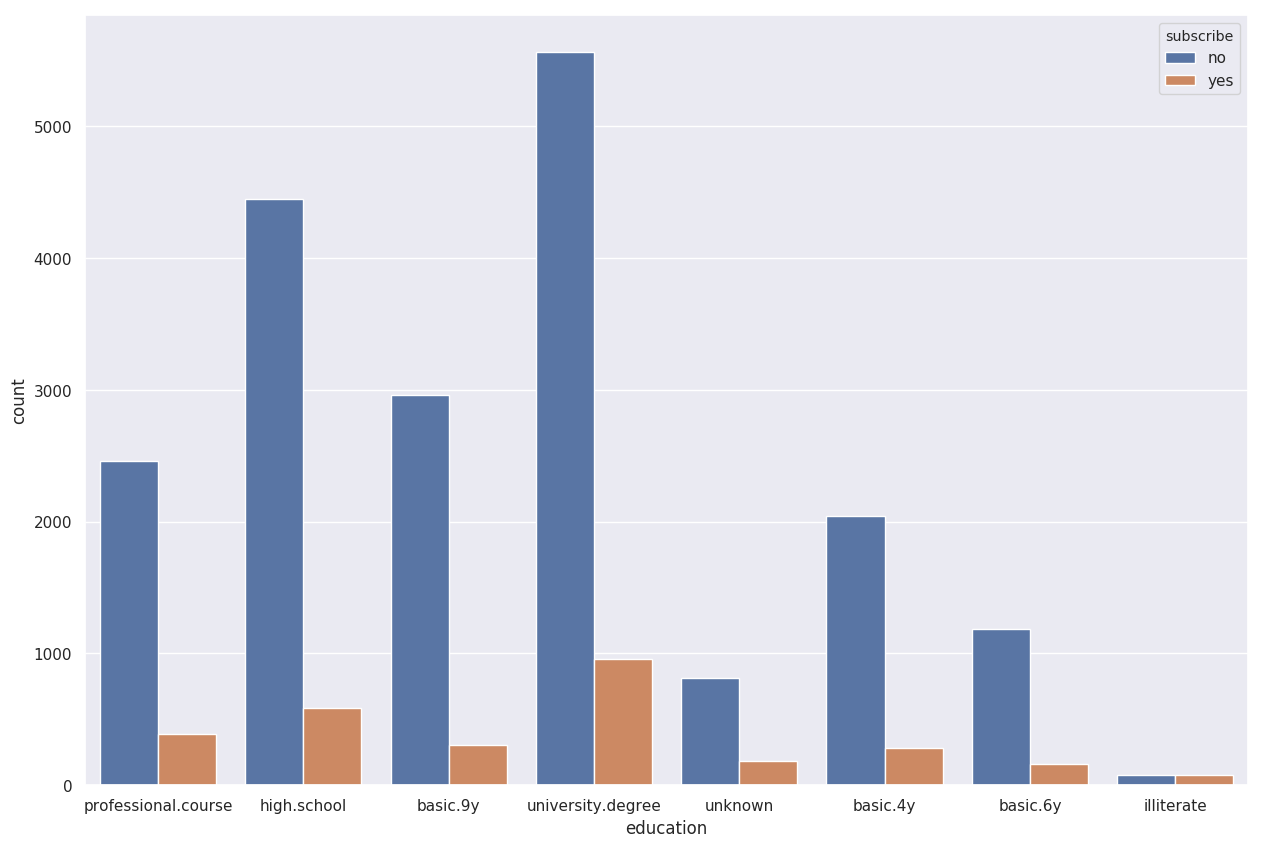

In [28]:
# 教育情况
sns.countplot(data=train,x='education',hue='subscribe')

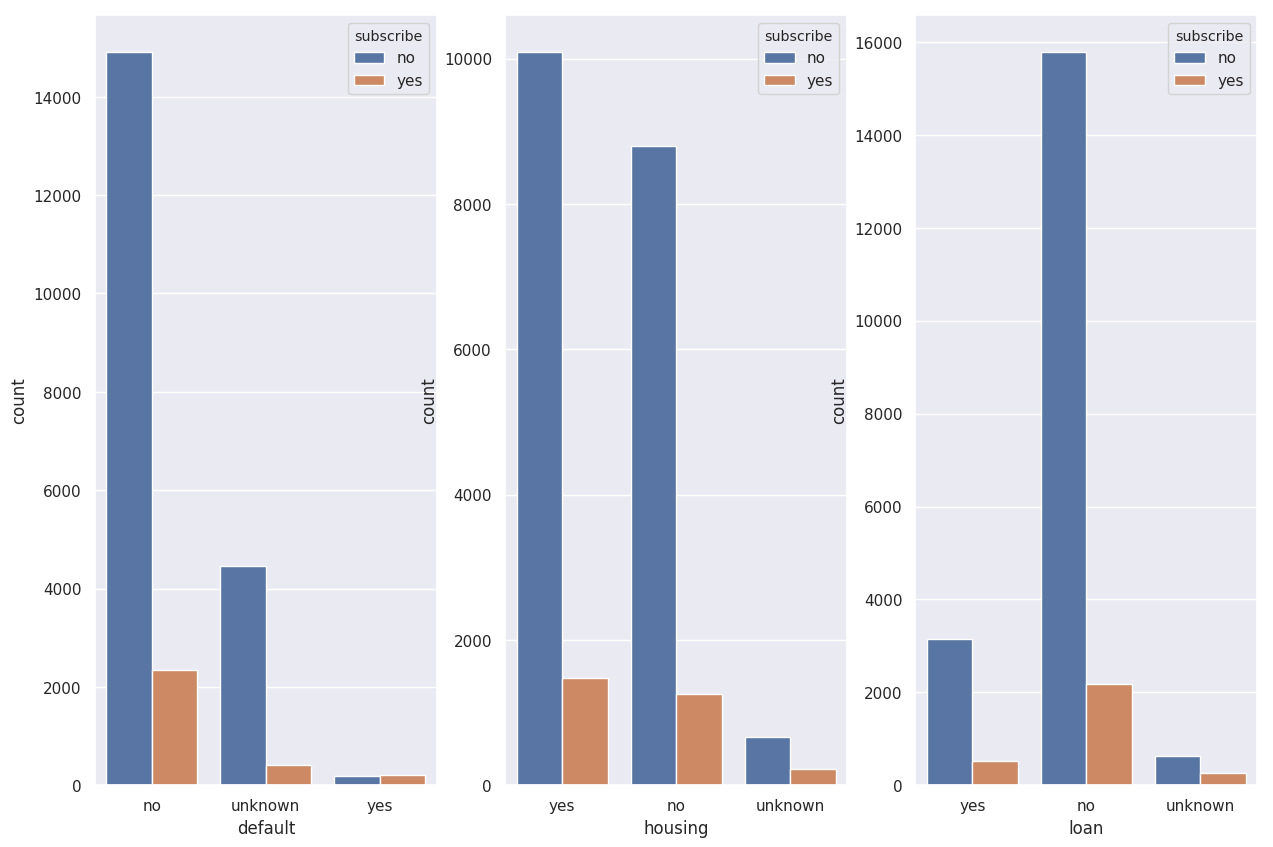

In [33]:
# 查看违约，房贷，贷款
fig,axes = plt.subplots(1,3)
sns.countplot(data=train,x='default',hue='subscribe',ax=axes[0])
sns.countplot(data=train,x='housing',hue='subscribe',ax=axes[1])
sns.countplot(data=train,x='loan',hue='subscribe',ax=axes[2])

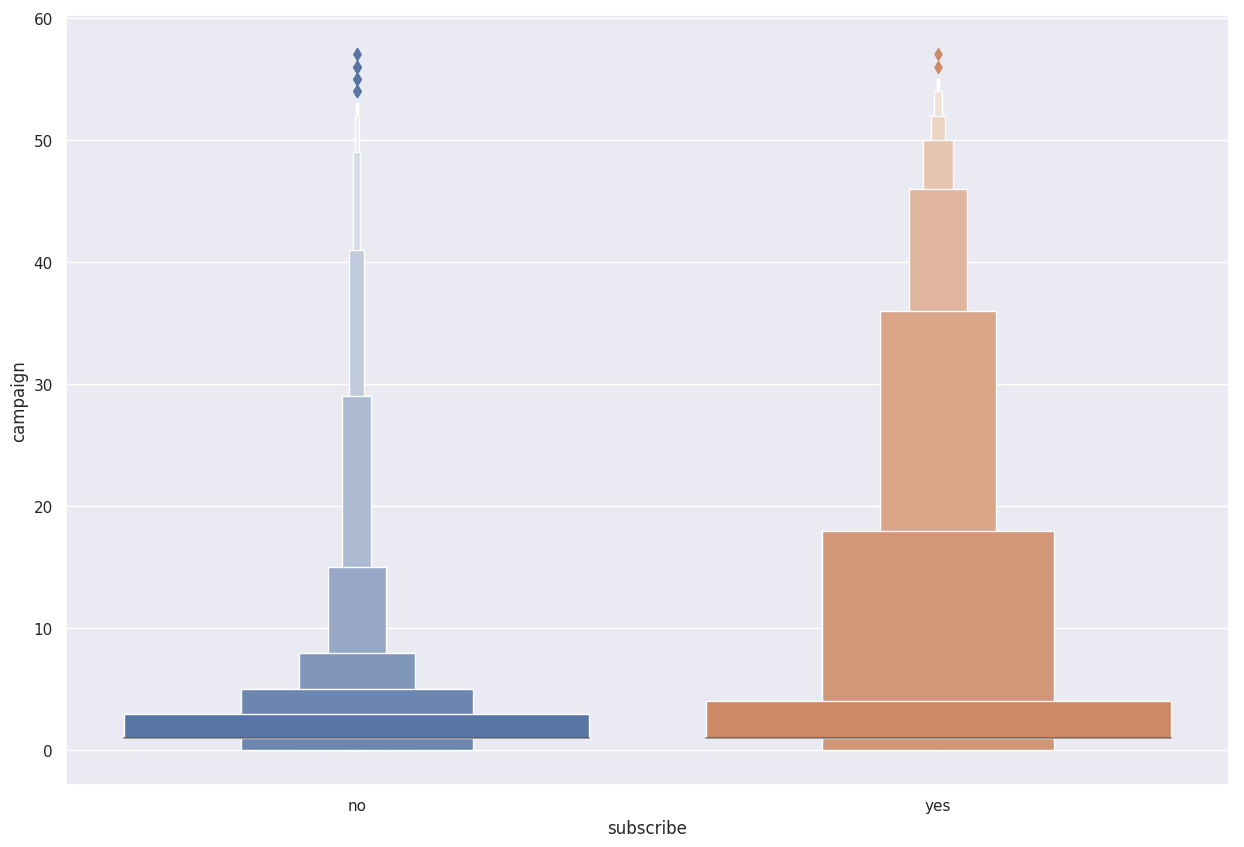

In [52]:
sns.boxenplot(x='subscribe', y='campaign', data=train)

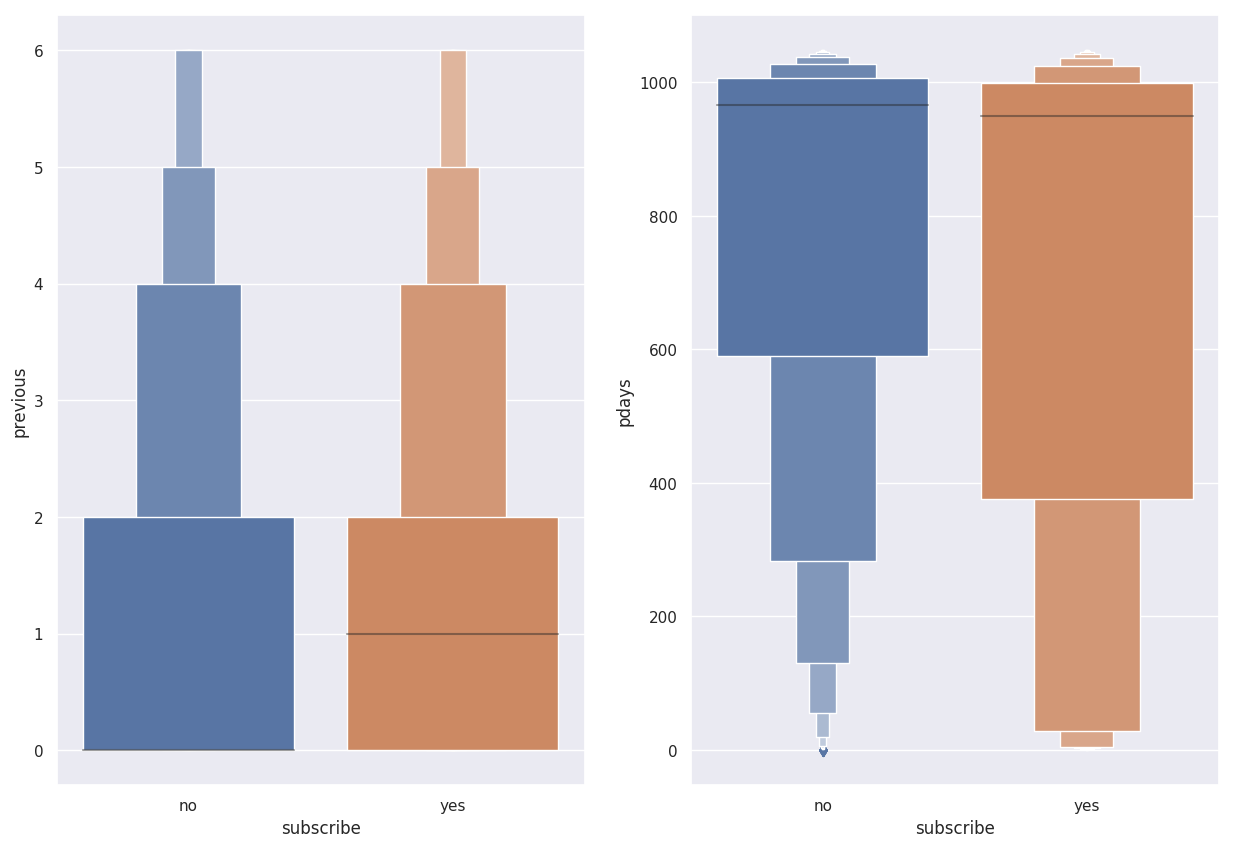

In [53]:
plt.subplot(1,2,1)
sns.boxenplot(x='subscribe', y='previous', data=train)
plt.subplot(1,2,2)
sns.boxenplot(x='subscribe', y=u'pdays', data=train)
plt.show()

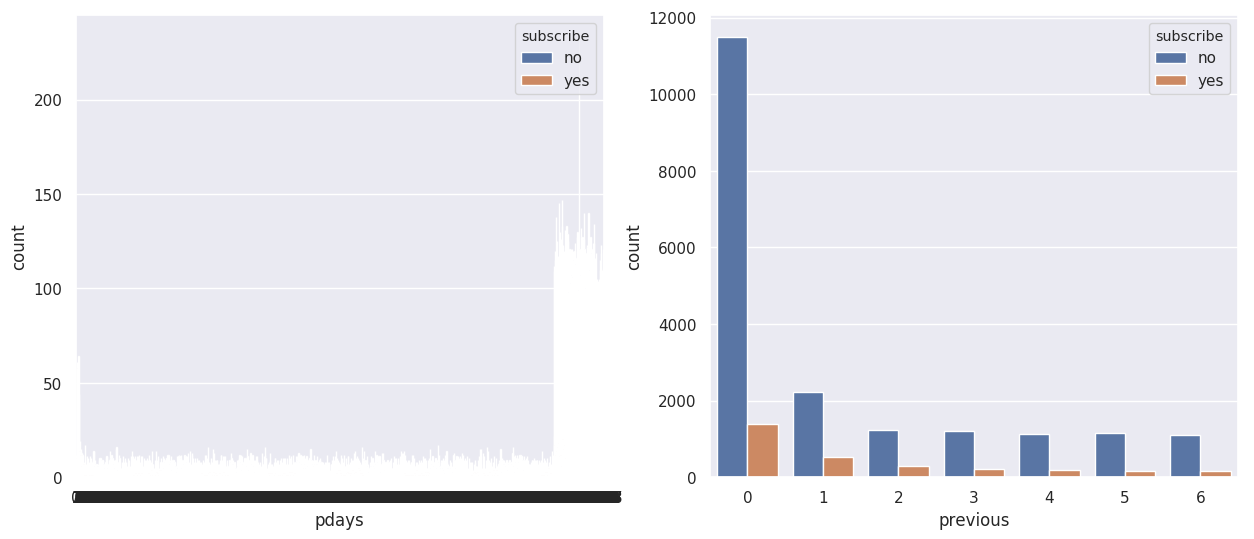

In [44]:
# 查看间隔天数，联系次数
fig,axes=plt.subplots(1,2,figsize=(15,6))
sns.countplot(data=train,x='pdays',hue='subscribe',ax=axes[0])
sns.countplot(data=train,x='previous',hue='subscribe',ax=axes[1])

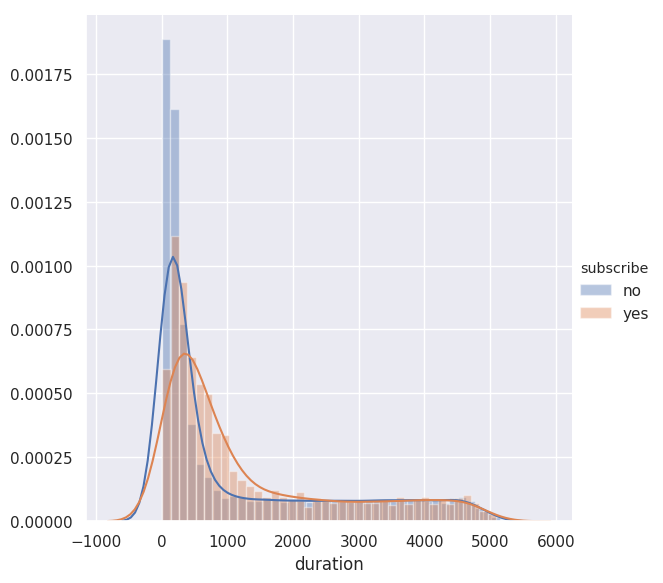

In [36]:
# 查看联系时长
g=sns.FacetGrid(data=train,height=6,hue='subscribe')
g=(g.map(sns.distplot,'duration',bins=40).add_legend())

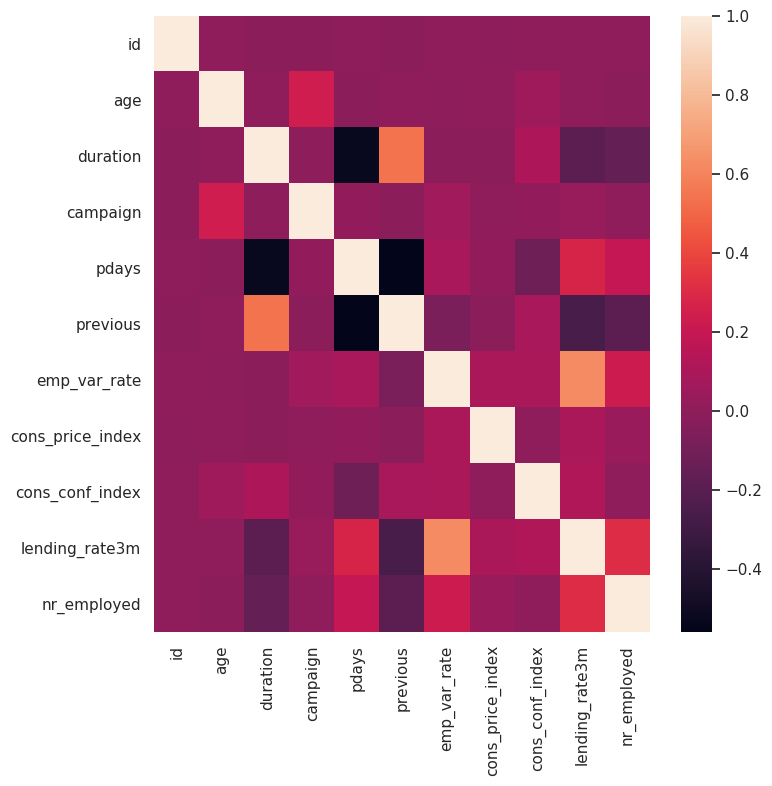

In [47]:
# 绘制相关系数热力图
plt.figure(figsize=(8,8))
sns.heatmap(train.corr())

In [6]:
# 查看数据是否有空缺
train.isnull().sum()

id                  0
age                 0
job                 0
marital             0
education           0
default             0
housing             0
loan                0
contact             0
month               0
day_of_week         0
duration            0
campaign            0
pdays               0
previous            0
poutcome            0
emp_var_rate        0
cons_price_index    0
cons_conf_index     0
lending_rate3m      0
nr_employed         0
subscribe           0
dtype: int64

In [8]:
# 数据替换
import random
train['job'].replace(['unknown'],train['job'].mode(),inplace=True)
train['marital'].replace(['unknown'],train['marital'].mode(),inplace=True)
train['education'].replace(['unknown'],train['education'].mode(),inplace=True)
train['default'].replace(['unknown'],train['default'].mode(),inplace=True)
train['housing'].replace(['unknown'],train['housing'].mode(),inplace=True)
train['loan'].replace(['unknown'],random.choice(['yes', 'no']) ,inplace=True)

test['job'].replace(['unknown'],test['job'].mode(),inplace=True)
test['marital'].replace(['unknown'],test['marital'].mode(),inplace=True)
test['education'].replace(['unknown'],test['education'].mode(),inplace=True)
test['default'].replace(['unknown'],test['default'].mode(),inplace=True)
test['housing'].replace(['unknown'],test['housing'].mode(),inplace=True)
test['loan'].replace(['unknown'],random.choice(['yes', 'no']) ,inplace=True)


In [26]:
from scipy.stats import chi2_contingency       # 数值型特征检验，检验特征与标签的关系
from scipy.stats import f_oneway,ttest_ind     # 分类型特征检验，检验特征与标签的关系

In [27]:
# 数据集处理
from sklearn.model_selection import train_test_split        # 划分训练集和验证集
from sklearn.model_selection import KFold,StratifiedKFold   # k折交叉
from imblearn.combine import SMOTETomek,SMOTEENN            # 综合采样
from imblearn.over_sampling import SMOTE                    # 过采样
from imblearn.under_sampling import RandomUnderSampler      # 欠采样
 
# 数据处理
from sklearn.preprocessing import StandardScaler # 标准化
from sklearn.preprocessing import OneHotEncoder  # 热独编码
from sklearn.preprocessing import OrdinalEncoder # 顺序编码

In [30]:
# 离散变量编码
dummy_train = train.join(pd.get_dummies(train[str_features])).drop(str_features,axis=1).drop(['id','subscribe'],axis=1)

dummy_test = test.join(pd.get_dummies(test[str_features])).drop(str_features,axis=1).drop(['id'],axis=1)

In [31]:
for col in str_features:
    obs=pd.crosstab(train['subscribe'],
                    train[col],
                    rownames=['subscribe'],
                    colnames=[col])
    chi2, p, dof, expect = chi2_contingency(obs)
    print("{} 卡方检验p值: {:.5f}".format(col,p))

job 卡方检验p值: 0.0000
marital 卡方检验p值: 0.0000
education 卡方检验p值: 0.0000
default 卡方检验p值: 0.0000
housing 卡方检验p值: 0.0000
loan 卡方检验p值: 0.0000
contact 卡方检验p值: 0.0000
month 卡方检验p值: 0.0000
day_of_week 卡方检验p值: 0.0002
poutcome 卡方检验p值: 0.0000


In [32]:
# 对连续变量做方差分析进行特征筛选
from sklearn.feature_selection import SelectKBest,f_classif
 
f,p=f_classif(train[num_features],train['subscribe'])
k = f.shape[0] - (p > 0.05).sum()
selector = SelectKBest(f_classif, k=k)
selector.fit(train[num_features],train['subscribe'])
 
print('scores_:',selector.scores_)
print('pvalues_:',selector.pvalues_)
print('selected index:',selector.get_support(True))

scores_: [ 198.59919072   30.98372803  621.65400063  223.28586178   24.31051625
 1775.34927647    5.01080289   16.65075938  761.98753195  151.87308805]
pvalues_: [6.55629388e-045 2.63167473e-008 2.24527779e-135 3.02580245e-050
 8.25739351e-007 0.00000000e+000 2.51993622e-002 4.50872301e-005
 5.55243653e-165 8.74648534e-035]
selected index: [0 1 2 3 4 5 6 7 8 9]


In [33]:
# 标准化，返回值为标准化后的数据
standardScaler = StandardScaler()
ss = standardScaler.fit(dummy_train.loc[:,num_features])
dummy_train.loc[:,num_features] = ss.transform(dummy_train.loc[:,num_features])
dummy_test.loc[:,num_features] = ss.transform(dummy_test.loc[:,num_features])

In [36]:
# 拆分数据集为训练集和验证集，验证集不动
X=dummy_train
y=train['subscribe']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)

In [37]:
# 处理不平衡数据
smote_tomek = SMOTETomek(random_state=10)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)

In [38]:
# 模型库
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
# 评估库
from sklearn.metrics import confusion_matrix # 混淆矩阵
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [41]:
# 随机森林
param = {'n_estimators':[171,200,500],
         'max_features':[24, 25, 26],
         'min_samples_leaf':[1, 2, 4]}
gs = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param, cv=2, scoring="f1", n_jobs=-1, verbose=10) 
gs.fit(X_resampled,y_resampled)
print(gs.best_params_) 
y_pred = gs.best_estimator_.predict(X_valid) 
print(classification_report(y_valid, y_pred))

Fitting 2 folds for each of 27 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:  7.9min finished


{'max_features': 24, 'min_samples_leaf': 1, 'n_estimators': 500}
              precision    recall  f1-score   support

          no       0.93      0.93      0.93      3938
         yes       0.51      0.51      0.51       562

    accuracy                           0.88      4500
   macro avg       0.72      0.72      0.72      4500
weighted avg       0.88      0.88      0.88      4500



In [42]:
# 训练集混淆矩阵
confusion_matrix(y_resampled,gs.best_estimator_.predict(X_resampled),labels=['yes','no'])

array([[15610,     0],
       [    0, 15610]])

In [43]:
# 验证集混淆矩阵
confusion_matrix(y_valid,y_pred,labels=['yes','no'])

array([[ 289,  273],
       [ 282, 3656]])

In [46]:
# 预测
X_test = dummy_test
y_test = gs.best_estimator_.predict(X_test)
test['subscribe'] = y_test

In [47]:
# 输出
test[['id','subscribe']].to_csv('submission.csv',index=None)